<a href="https://colab.research.google.com/github/edwin-isa/MACHINE_LEARNING/blob/Quiz-1/Kuis1_ML_Multinomial_Naive_Bayes_With%26Without_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 1 Machine Learning 2023

## **Nama Anggota Kelompok**:

1. Alfina Salsabilla (2141720044 / TI-3D)
2. M Abiyyu Arldana S (2141720196 / TI-3D)
3. Mohamad Edwin Isa Alfais (2141720193/TI-3D)

# Deskripsi Umum
Anda diminta untuk melakukan klasi kasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST
Tentang Dataset MNIST


# Dataset MNIST (Modified National Institute of Standards and Technology)
Merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

# Jawab

## Mengunduh Dataset MNIST

In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Baca deskripsi dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# Inspeksi semua key dalam dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

## Detail Kuis 1

Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Jumlah data untuk label 0: 6903
Jumlah data untuk label 1: 7877
Jumlah data untuk label 2: 6990
Jumlah data untuk label 3: 7141
Jumlah data untuk label 4: 6824
Jumlah data untuk label 5: 6313
Jumlah data untuk label 6: 6876
Jumlah data untuk label 7: 7293
Jumlah data untuk label 8: 6825
Jumlah data untuk label 9: 6958


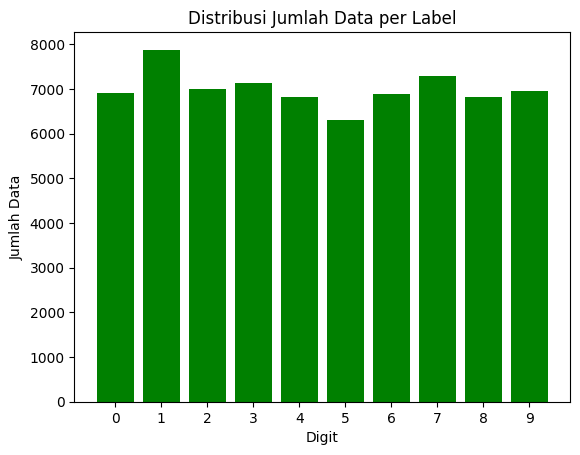

In [ ]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Jumlah data untuk label {i}: {label_counts[i]}")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10), color='green')
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

In [ ]:
# Membuktikan data imbalance

# Data kelas Anda dalam bentuk dictionary
data = {
    'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Jumlah Data': [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung total jumlah data di semua label
total_data = df['Jumlah Data'].sum()

# Menambahkan kolom "Persentase" yang berisi persentase distribusi
df['Persentase'] = (df['Jumlah Data'] / total_data) * 100

# Menampilkan informasi tentang distribusi data
print("Informasi tentang Distribusi Data pada Setiap Label:")
print(df)

# Memeriksa apakah terdapat ketidakseimbangan data
threshold = 5  # Anda dapat menyesuaikan nilai ambang sesuai kebutuhan
imbalanced_labels = df[df['Persentase'] < threshold]

if not imbalanced_labels.empty:
    print("\nTerdapat ketidakseimbangan data pada label-label berikut:")
    print(imbalanced_labels)
else:
    print("\nData terdistribusi dengan baik tanpa ketidakseimbangan.")

Informasi tentang Distribusi Data pada Setiap Label:
   Label  Jumlah Data  Persentase
0      0         6903    9.861429
1      1         7877   11.252857
2      2         6990    9.985714
3      3         7141   10.201429
4      4         6824    9.748571
5      5         6313    9.018571
6      6         6876    9.822857
7      7         7293   10.418571
8      8         6825    9.750000
9      9         6958    9.940000

Data terdistribusi dengan baik tanpa ketidakseimbangan.


## Detail Kuis 2

Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

In [ ]:
# Mengambil data dan target dari dataset MNIST
X, y = mnist.data.to_numpy(), mnist.target.astype(int)

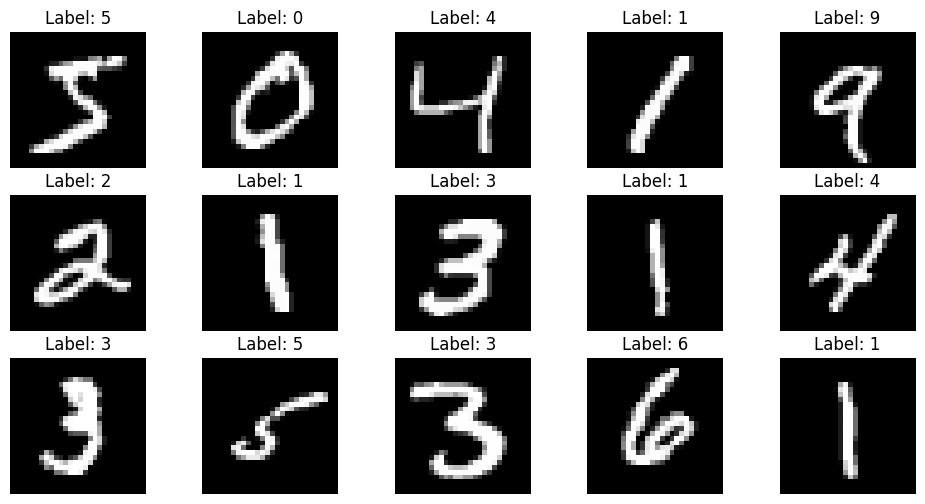

In [ ]:
# Menampilkan 15 Citra Pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

## Detail Kuis 3 - 8


3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
* Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
* Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.


4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.


5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
*   Anda diperbolehkan untuk melakukan tunning parameter.
*   Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.


6. Evaluasi model yang Anda buat terhadap data training dan data testing.
*   Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
*   Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
*   Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.


7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.


8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

#### A. *Multinomial Naive Bayes dengan PCA*

##### Melakukan Ekstrasi Fitur dengan PCA

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# Inisialisasi objek PCA (Principal Component Analysis)
# - n_components: jumlah komponen utama yang akan dihasilkan oleh PCA
# - whiten: mengaktifkan pencerahan (scaling) komponen utama (dalam konteks ini, akan digunakan untuk PCA)
# - random_state: pengacakan agar hasil dapat direproduksi
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

##### Split Data 70:30

###### Melakukan Split Data

In [ ]:
# Pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Membuat Model Multinominal Naive Bayes dan Mengevaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Inisialisasi objek MinMaxScaler
minmax = MinMaxScaler()

# Membentuk pipeline dengan urutan: PCA -> MinMaxScaler -> Multinomial Naive Bayes
model = make_pipeline(pca, minmax, mnb)

# Fit model
model.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = model.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = model.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train} = {acc_train * 100:.2f}%')
print(f'Hasil akurasi data test: {acc_test} = {acc_test * 100:.2f}%')

# membuat classification report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Hasil akurasi data train: 0.7906326530612245 = 79.06%
Hasil akurasi data test: 0.7867142857142857 = 78.67%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      2058
           1       0.62      0.99      0.76      2364
           2       0.89      0.75      0.81      2133
           3       0.66      0.82      0.73      2176
           4       0.79      0.85      0.82      1936
           5       0.97      0.28      0.44      1915
           6       0.91      0.86      0.88      2088
           7       0.81      0.87      0.84      2248
           8       0.81      0.69      0.75      1992
           9       0.79      0.77      0.78      2090

    accuracy                           0.79     21000
   macro avg       0.82      0.78      0.77     21000
weighted avg       0.82      0.79      0.78     21000



###### Membuat Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

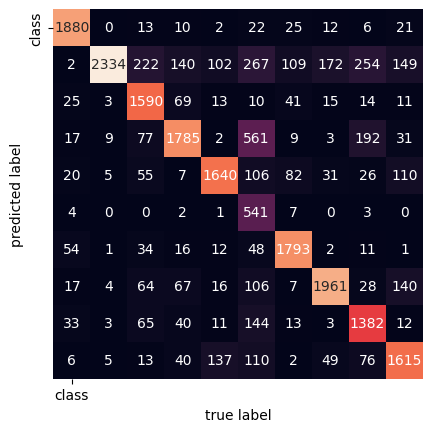

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Bentuk confusion matrix
mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

###### Menampilkan Citra Data Testing dan Hasil Pelabelannya

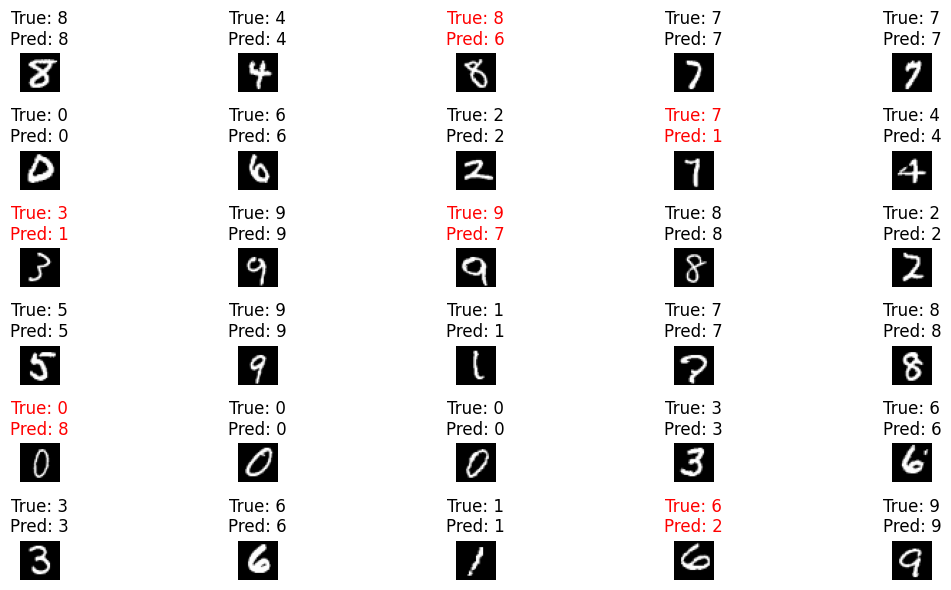

In [ ]:
n_samples_to_display = 30
# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

##### Split Data 80:20

###### Melakukan Split Data

In [ ]:
# Pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Membuat Model Multinominal Naive Bayes dan Mengevaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Inisialisasi objek MinMaxScaler
minmax = MinMaxScaler()

# Membentuk pipeline dengan urutan: PCA -> MinMaxScaler -> Multinomial Naive Bayes
model = make_pipeline(pca, minmax, mnb)

# Fit model
model.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = model.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = model.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train} = {acc_train * 100:.2f}%')
print(f'Hasil akurasi data test: {acc_test} = {acc_test * 100:.2f}%')

# membuat classification report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Hasil akurasi data train: 0.7897321428571429 = 78.97%
Hasil akurasi data test: 0.7909285714285714 = 79.09%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1343
           1       0.64      0.98      0.78      1600
           2       0.86      0.77      0.81      1380
           3       0.65      0.83      0.73      1433
           4       0.82      0.84      0.83      1295
           5       0.97      0.29      0.45      1273
           6       0.91      0.86      0.88      1396
           7       0.78      0.89      0.83      1503
           8       0.86      0.68      0.76      1357
           9       0.80      0.76      0.78      1420

    accuracy                           0.79     14000
   macro avg       0.82      0.78      0.78     14000
weighted avg       0.82      0.79      0.78     14000



###### Membuat Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

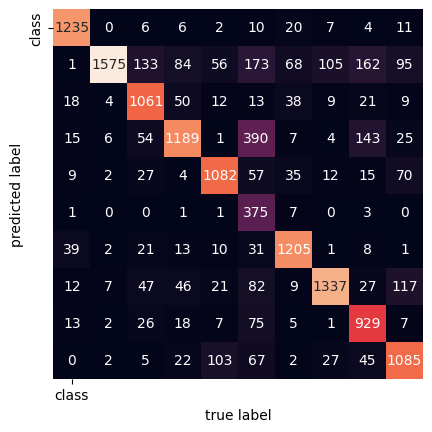

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Bentuk confusion matrix
mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

###### Menampilkan Citra Data Testing dan Hasil Pelabelannya

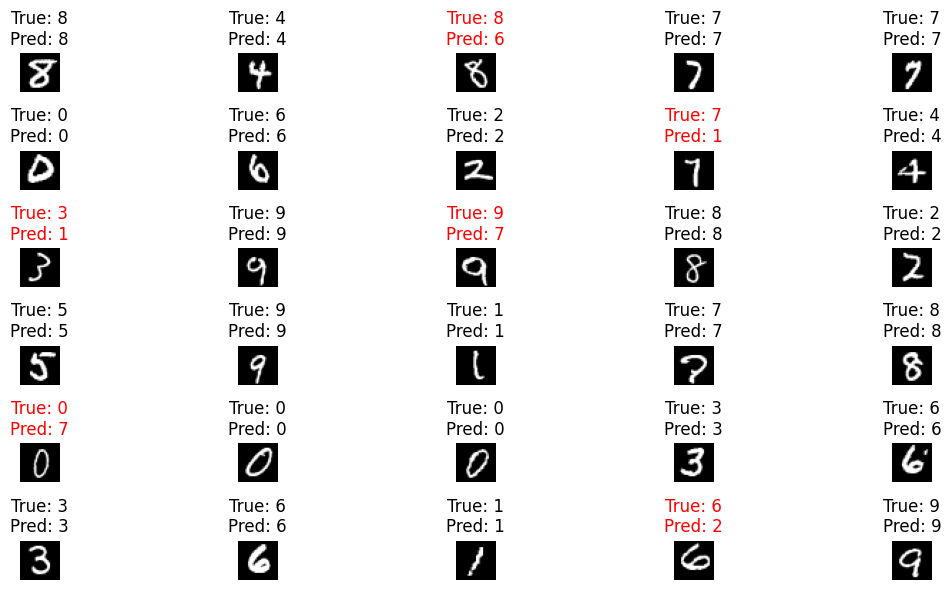

In [ ]:
n_samples_to_display = 30
# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

##### Split Data 90:10

###### Melakukan Split Data

In [ ]:
# Pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

###### Membuat Model Multinominal Naive Bayes dan Mengevaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Inisialisasi objek MinMaxScaler
minmax = MinMaxScaler()

# Membentuk pipeline dengan urutan: PCA -> MinMaxScaler -> Multinomial Naive Bayes
model = make_pipeline(pca, minmax, mnb)

# Fit model
model.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = model.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = model.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train} = {acc_train * 100:.2f}%')
print(f'Hasil akurasi data test: {acc_test} = {acc_test * 100:.2f}%')

# membuat classification report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Hasil akurasi data train: 0.7875873015873016 = 78.76%
Hasil akurasi data test: 0.785 = 78.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       683
           1       0.64      0.98      0.77       800
           2       0.84      0.78      0.81       674
           3       0.67      0.82      0.74       760
           4       0.82      0.83      0.82       611
           5       0.98      0.30      0.46       658
           6       0.88      0.86      0.87       677
           7       0.75      0.90      0.82       724
           8       0.85      0.66      0.74       693
           9       0.81      0.77      0.79       720

    accuracy                           0.79      7000
   macro avg       0.82      0.78      0.77      7000
weighted avg       0.81      0.79      0.77      7000



###### Membuat Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

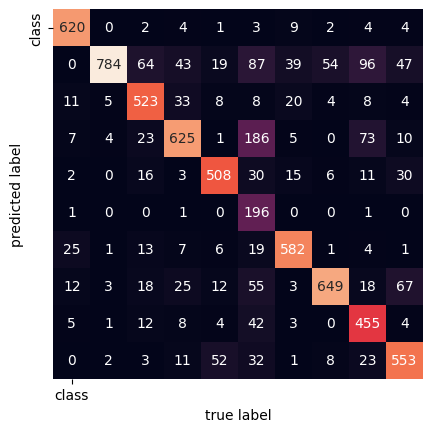

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Bentuk confusion matrix
mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

###### Menampilkan Citra Data Testing dan Hasil Pelabelannya

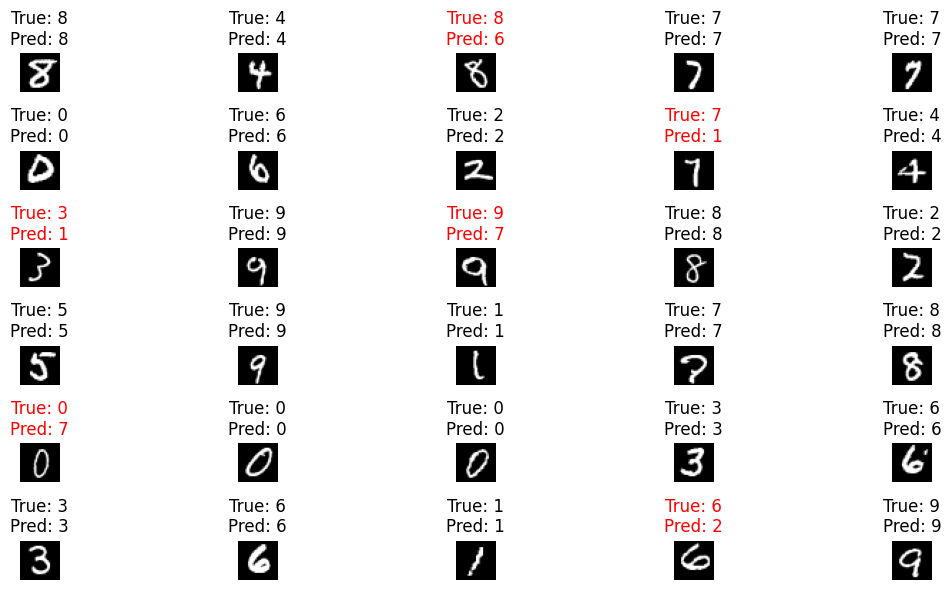

In [ ]:
n_samples_to_display = 30
# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

#### B. *Multinomial Naive Bayes Tanpa PCA*

##### Split Data 70:30

###### Melakukan Split Data

In [ ]:
# Pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Membuat Model Multinominal Naive Bayes dan Mengevaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train} = {acc_train * 100:.2f}%')
print(f'Hasil akurasi data test: {acc_test} = {acc_test * 100:.2f}%')

# membuat classification report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Hasil akurasi data train: 0.8278979591836735 = 82.79%
Hasil akurasi data test: 0.8257142857142857 = 82.57%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
           2       0.88      0.83      0.85      2133
           3       0.79      0.81      0.80      2176
           4       0.83      0.74      0.78      1936
           5       0.85      0.66      0.75      1915
           6       0.87      0.92      0.89      2088
           7       0.94      0.83      0.88      2248
           8       0.65      0.77      0.70      1992
           9       0.69      0.83      0.76      2090

    accuracy                           0.83     21000
   macro avg       0.83      0.82      0.82     21000
weighted avg       0.83      0.83      0.83     21000



###### Membuat Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

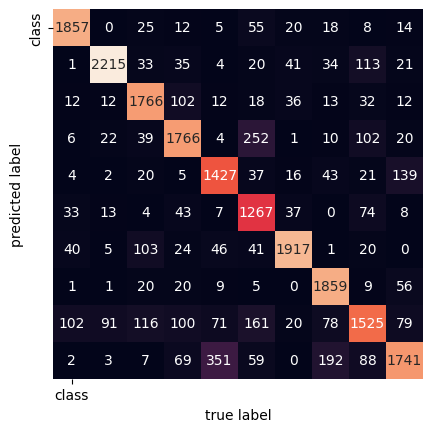

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Bentuk confusion matrix
mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

###### Menampilkan Citra Data Testing dan Hasil Pelabelannya

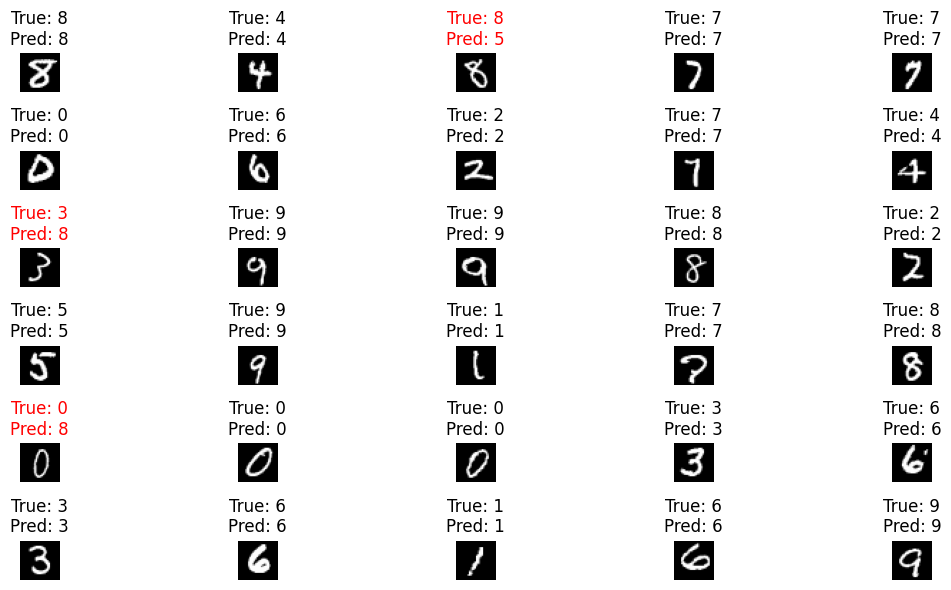

In [ ]:
n_samples_to_display = 30
# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

##### Split Data 80:20

###### Melakukan Split Data

In [ ]:
# Pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Membuat Model Multinominal Naive Bayes dan Mengevaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train} = {acc_train * 100:.2f}%')
print(f'Hasil akurasi data test: {acc_test} = {acc_test * 100:.2f}%')

# membuat classification report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Hasil akurasi data train: 0.8266785714285714 = 82.67%
Hasil akurasi data test: 0.829 = 82.90%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1343
           1       0.88      0.94      0.90      1600
           2       0.88      0.83      0.85      1380
           3       0.80      0.82      0.81      1433
           4       0.84      0.74      0.78      1295
           5       0.86      0.67      0.75      1273
           6       0.88      0.91      0.90      1396
           7       0.94      0.83      0.88      1503
           8       0.67      0.78      0.72      1357
           9       0.70      0.84      0.76      1420

    accuracy                           0.83     14000
   macro avg       0.84      0.83      0.83     14000
weighted avg       0.84      0.83      0.83     14000



###### Membuat Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

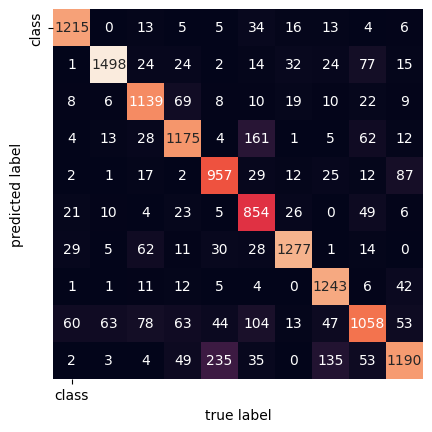

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Bentuk confusion matrix
mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

###### Menampilkan Citra Data Testing dan Hasil Pelabelannya

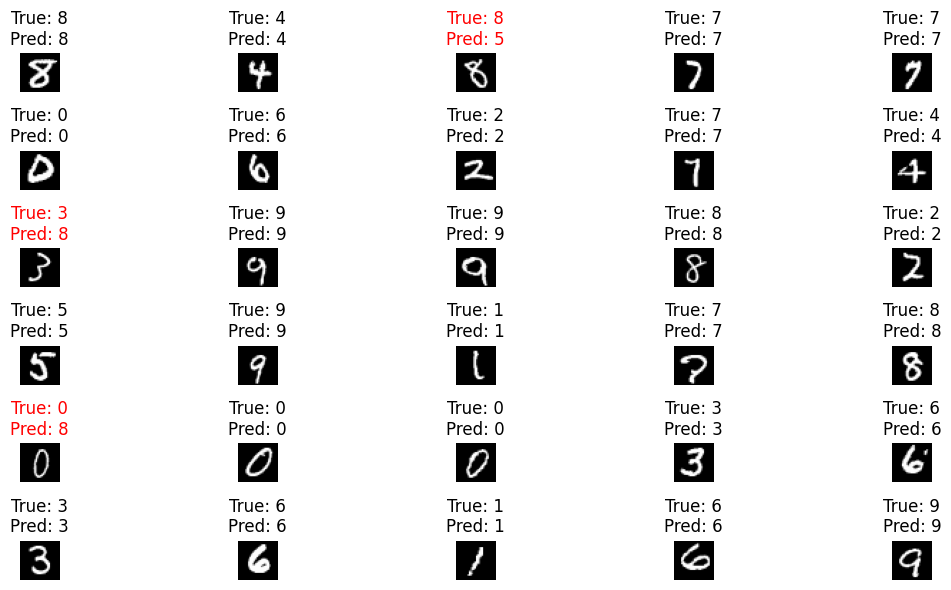

In [ ]:
n_samples_to_display = 30
# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

##### Split Data 90:10

###### Melakukan Split Data

In [ ]:
# Pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

###### Membuat Model Multinominal Naive Bayes dan Mengevaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train} = {acc_train * 100:.2f}%')
print(f'Hasil akurasi data test: {acc_test} = {acc_test * 100:.2f}%')

# membuat classification report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Hasil akurasi data train: 0.8268412698412698 = 82.68%
Hasil akurasi data test: 0.8294285714285714 = 82.94%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       683
           1       0.86      0.94      0.90       800
           2       0.87      0.82      0.85       674
           3       0.79      0.82      0.81       760
           4       0.83      0.74      0.79       611
           5       0.88      0.69      0.77       658
           6       0.86      0.91      0.89       677
           7       0.95      0.82      0.88       724
           8       0.67      0.76      0.71       693
           9       0.72      0.85      0.78       720

    accuracy                           0.83      7000
   macro avg       0.84      0.83      0.83      7000
weighted avg       0.84      0.83      0.83      7000



###### Membuat Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

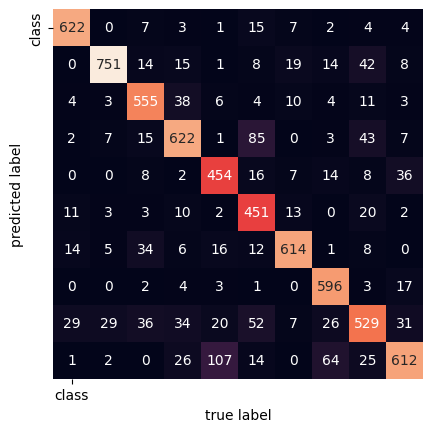

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Bentuk confusion matrix
mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

###### Menampilkan Citra Data Testing dan Hasil Pelabelannya

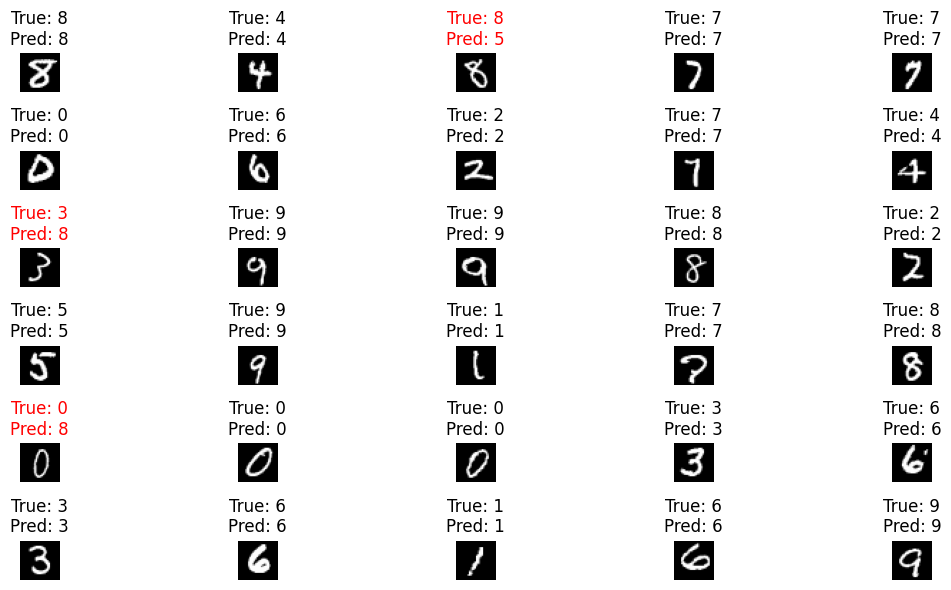

In [ ]:
n_samples_to_display = 30
# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()